# GAN
---

In [4]:
IMG_SHAPE = (32,32,3)
Z_DIM = 128

## 데이터 로더

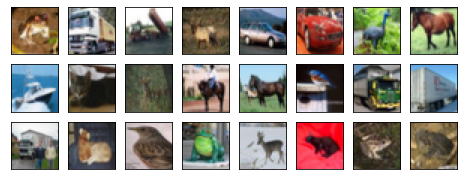

(50000, 32, 32, 3)

In [5]:
from data_loader import *
from utils import display_sample_img
x_train, _, _, _ = cifar10_loader(True)
display_sample_img(x_train, (3,8), True)
x_train.shape
# 이미지 -1~1 제너레이터가 -1~1까지의 이미지를 생성해야한다.

## 모델 구성

In [6]:
from model import BuildModel
builder = BuildModel(IMG_SHAPE, Z_DIM)
gene = builder.build_gene(last_activation='tanh') # tanh : -1 ~ 1 아웃풋  sigmoid: 0~1 아웃풋
disc = builder.build_disc()
gene.summary()
disc.summary()

Model: "Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128)]             0         
                                                                 
 dense_2 (Dense)             (None, 8192)              1056768   
                                                                 
 reshape_1 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 batch_normalization_2 (Batc  (None, 8, 8, 128)        512       
 hNormalization)                                                 
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 16, 16, 64)       204864    
 ranspose)                                                       
                                                                 
 batch_normalization_3 (Batc  (None, 16, 16, 64)       25

## 학습

Model: "GAN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128)]             0         
                                                                 
 Generator (Functional)      (None, 32, 32, 3)         1267203   
                                                                 
 Discriminator (Functional)  (None, 1)                 217985    
                                                                 
Total params: 1,485,188
Trainable params: 1,266,819
Non-trainable params: 218,369
_________________________________________________________________


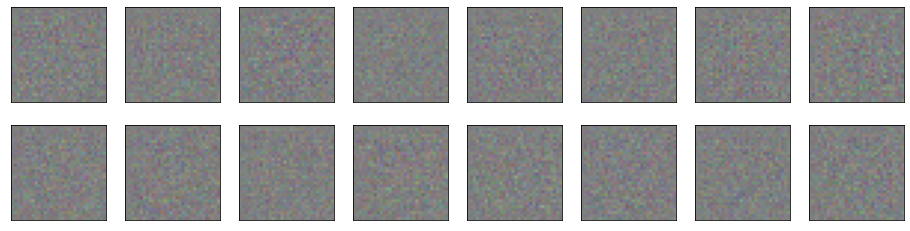

* epoch: 2, d_loss: 281.632879, g_loss: 6567.290503


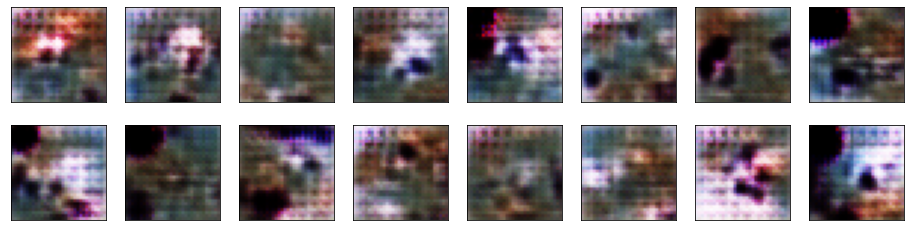

* epoch: 3, d_loss: 278.970390, g_loss: 6862.820860


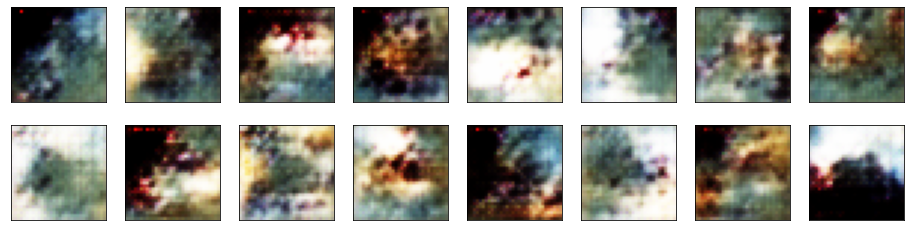

* epoch: 4, d_loss: 277.150460, g_loss: 6662.810781


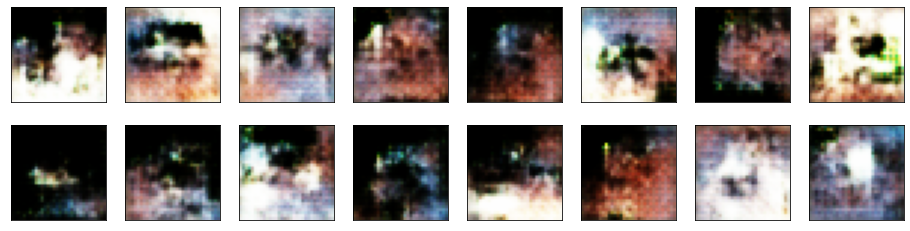

* epoch: 5, d_loss: 236.310222, g_loss: 7114.472533


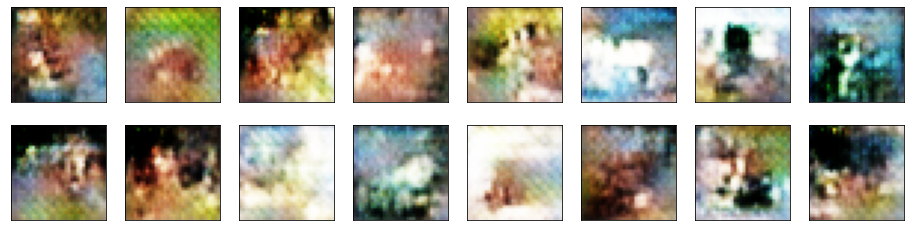

In [7]:
from gan import GAN
model = GAN(gene, disc, IMG_SHAPE, Z_DIM)
model.compile()
model.gan.summary()
model.fit(x_train,  epochs= 5, standard=True)